In [1]:
import sys
import os



# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join( '..')))

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ABC\Desktop\10Acadamy\week 2\playstore-bank-reviews\data\reviews_sentiment_comparison.csv') 

In [3]:
from src.further_topic_extraction import get_theme_keywords,print_theme_keywords,print_sentiment_samples_by_bank, count_multiple_theme_occurrences
theme_dict = get_theme_keywords(df)
print_theme_keywords(theme_dict)

Bank: CBE, Sentiment: POSITIVE, Top Keywords: ['app', 'good', 'best', 'easy', 'nice', 'use', 'fast', 'application', 'cbe', 'great', 'bank', 'like', 'banking', 'simple', 'service']
Bank: CBE, Sentiment: NEGATIVE, Top Keywords: ['app', 'update', 'working', 'good', 'work', 'transaction', 'bank', 'doesn', 'use', 'account', 'time', 'money', 'application', 'cbe', 'fix']
Bank: BOA, Sentiment: POSITIVE, Top Keywords: ['app', 'good', 'great', 'best', 'bank', 'nice', 'boa', 'easy', 'like', 'fast', 'application', 'service', 'thank', 'banking', 'use']
Bank: BOA, Sentiment: NEGATIVE, Top Keywords: ['app', 'work', 'working', 'worst', 'bank', 'banking', 'mobile', 'doesn', 'update', 'use', 'fix', 'time', 'boa', 'application', 'slow']
Bank: Dashen, Sentiment: POSITIVE, Top Keywords: ['app', 'dashen', 'best', 'bank', 'super', 'easy', 'banking', 'use', 'fast', 'good', 'amazing', 'step', 'features', 'application', 'user']
Bank: Dashen, Sentiment: NEGATIVE, Top Keywords: ['app', 'good', 'slow', 'bank', 'da

In [4]:
# Example usage:
print_sentiment_samples_by_bank(df, bank_col='bank', review_col='review',sentiment_col='distilbert_sentiment', n=10)



========== Bank: CBE ==========

--- POSITIVE REVIEWS ---
1. I'm always using the Apps safely.Thanks.
2. Very nice and fast app
3. very very nice aplication
4. Please include full Bank statement access through this app
5. Good job, try your best. You can do anything you need.
6. It is good but not fast
7. This App The Best One
8. I like this application and It's very useful
9. Very good thank you
10. Simple and secure app

--- NEGATIVE REVIEWS ---
1. The worst app ever made! I transfered money to abyssinia bank account, deducted the money from my cbe account but never made it through to my abyssinia account! I hate this app and bank! Idk why they are making me wait a whole week to return my money! Even there call center 951 doesn't work! Shame!
2. Yesterday, system hackers have taken money out of my CBE account due to problems related with the CBE BIRR SMS and internet banking systems.You must further increase security of the system.I am willing to give further details if necessary. S

## Sample Insight Write-up (with Evidence)

### CBE

**Top drivers:**
- “easy”, “fast”, “simple” and “good” are among the most frequent positive words (e.g., “easy” in top 4).
- Indicates users find the app simple and efficient for banking needs.

**Pain points:**
- “update”, “working”, “fix”, and “transaction” frequently appear in negative reviews.
- **Evidence:** “update” is the 2nd most common negative word, suggesting app updates cause issues or dissatisfaction.

---

### BOA

**Top drivers:**
- “good”, “easy”, “fast”, “great”, “nice”, “thank”—positive customer sentiment is centered on ease of use and speed.

**Pain points:**
- “work”, “working”, “worst”, “doesn’t”, “update”, “fix”, “slow”.
- **Evidence:** “work” and “slow” indicate performance problems are a major user frustration.

---

### Dashen

**Top drivers:**
- “easy”, “super”, “fast”, “features”, “amazing”, “user”.
- Customers highlight advanced features and ease of use as key strengths.

**Pain points:**
- “slow”, “working”, “transaction”, “speed”, “worst”, “account”.
- **Evidence:** “slow” is a highly cited pain point, pointing to lag/performance issues.



In [5]:
theme_list = ['crash', 'login', 'transaction', 'slow', 'update']
theme_counts_df = count_multiple_theme_occurrences(df, themes=theme_list)
print(theme_counts_df)


      bank sentiment        theme  count
0      CBE  POSITIVE        crash      1
1      CBE  NEGATIVE        crash      4
2      BOA  POSITIVE        crash      0
3      BOA  NEGATIVE        crash      8
4   Dashen  POSITIVE        crash      0
5   Dashen  NEGATIVE        crash      0
6      CBE  POSITIVE        login      0
7      CBE  NEGATIVE        login      3
8      BOA  POSITIVE        login      1
9      BOA  NEGATIVE        login     21
10  Dashen  POSITIVE        login      2
11  Dashen  NEGATIVE        login      1
12     CBE  POSITIVE  transaction     26
13     CBE  NEGATIVE  transaction    101
14     BOA  POSITIVE  transaction      0
15     BOA  NEGATIVE  transaction     18
16  Dashen  POSITIVE  transaction      7
17  Dashen  NEGATIVE  transaction      8
18     CBE  POSITIVE         slow      1
19     CBE  NEGATIVE         slow     11
20     BOA  POSITIVE         slow      2
21     BOA  NEGATIVE         slow     25
22  Dashen  POSITIVE         slow      0
23  Dashen  NEGA

In [6]:
import plotly.express as px

def plot_theme_counts(theme_counts_df, min_count=1):
    # Filter to show only themes with significant mentions
    filtered = theme_counts_df[theme_counts_df['count'] > min_count]
    banks = filtered['bank'].unique()
    for bank in banks:
        data = filtered[filtered['bank'] == bank]
        fig = px.bar(
            data,
            x='theme',
            y='count',
            color='sentiment',
            barmode='group',
            title=f"Theme Mentions by Sentiment – {bank}",
            labels={'count': 'Number of Mentions', 'theme': 'Theme', 'sentiment': 'Sentiment'},
            height=400,
            width=800
        )
        fig.update_layout(xaxis_tickangle=-45)
        fig.show()

# Usage:
plot_theme_counts(theme_counts_df)


In [7]:
# List of desired features to track (expand as needed)
features = ['transfer', 'fingerprint', 'login', 'loading', 'notification', 'security', 'balance', 'statement', 'limit', 'update', 'customer service']
def count_feature_mentions_by_sentiment(
    df, features, 
    bank_col='bank', review_col='review', sentiment_col='distilbert_sentiment', 
    sentiments=('POSITIVE', 'NEGATIVE')
):
    feature_counts = []
    for bank in df[bank_col].unique():
        for feature in features:
            for sent in sentiments:
                subset = df[(df[bank_col] == bank) & (df[sentiment_col] == sent)]
                count = subset[review_col].str.lower().str.count(rf'\b{feature}\b').sum()
                feature_counts.append({
                    'bank': bank,
                    'feature': feature,
                    'sentiment': sent,
                    'count': count
                })
    return pd.DataFrame(feature_counts)

# Usage:
feature_counts_df = count_feature_mentions_by_sentiment(df, features)
# Optional: Filter features with significant mentions
popular_features = feature_counts_df[feature_counts_df['count'] > 5]
print(popular_features)



      bank           feature sentiment  count
0      CBE          transfer  POSITIVE     18
1      CBE          transfer  NEGATIVE     62
9      CBE      notification  NEGATIVE      9
10     CBE          security  POSITIVE     12
11     CBE          security  NEGATIVE     20
13     CBE           balance  NEGATIVE     39
14     CBE         statement  POSITIVE      7
15     CBE         statement  NEGATIVE     16
18     CBE            update  POSITIVE     21
19     CBE            update  NEGATIVE    109
21     CBE  customer service  NEGATIVE     11
23     BOA          transfer  NEGATIVE     15
27     BOA             login  NEGATIVE     21
29     BOA           loading  NEGATIVE      7
33     BOA          security  NEGATIVE      8
35     BOA           balance  NEGATIVE      7
41     BOA            update  NEGATIVE     50
54  Dashen          security  POSITIVE      9


In [8]:
import plotly.express as px

def plot_feature_sentiment_counts(feature_counts_df, min_count=5):
    # Filter to show only features with significant mentions
    filtered = feature_counts_df[feature_counts_df['count'] > min_count]
    banks = filtered['bank'].unique()
    for bank in banks:
        data = filtered[filtered['bank'] == bank]
        fig = px.bar(
            data,
            x='feature',
            y='count',
            color='sentiment',
            barmode='group',
            title=f"Feature Mentions by Sentiment – {bank}",
            labels={'count': 'Number of Mentions', 'feature': 'Feature', 'sentiment': 'Sentiment'},
            height=400,
            width=800
        )
        fig.update_layout(xaxis_tickangle=-45)
        fig.show()

# Usage:
plot_feature_sentiment_counts(feature_counts_df)


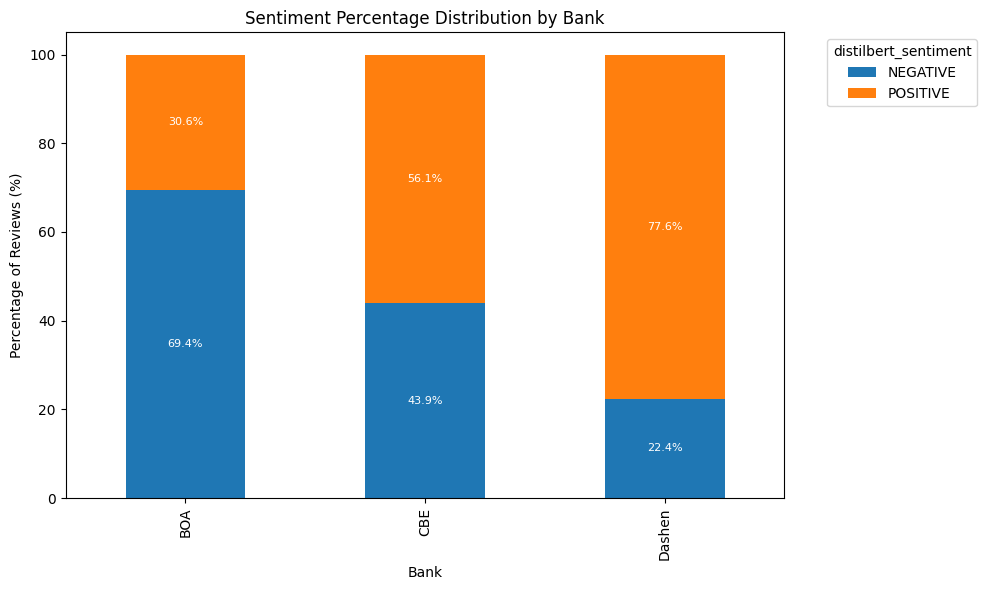

In [13]:
import matplotlib.pyplot as plt

# Calculate sentiment counts per bank
sentiment_by_bank = df.groupby(['bank', 'distilbert_sentiment']).size().unstack().fillna(0)

# Compute percentages per bank
sentiment_percentages = sentiment_by_bank.div(sentiment_by_bank.sum(axis=1), axis=0) * 100

# Plot percentage stacked bar chart
ax = sentiment_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels on each segment
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8, color='white')

# Plot aesthetics
plt.title('Sentiment Percentage Distribution by Bank')
plt.ylabel('Percentage of Reviews (%)')
plt.xlabel('Bank')
plt.legend(title='distilbert_sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



In [10]:
import plotly.express as px
# Create a count column for each (bank, rating) combination
df_counts = df.groupby(['bank', 'rating']).size().reset_index(name='count')
# Merge back to main df so each row has its count
df = pd.merge(df, df_counts, on=['bank', 'rating'], how='left')



fig = px.box(
    df,
    x='bank',
    y='rating',
    color='bank',
    points="all",  # Show all points
    title='Rating Distribution by Bank',
    hover_data=['count']  # Add the count column to the hover
)

fig.update_traces(
    hovertemplate=(
        'Bank: %{x}<br>'
        'Rating: %{y}<br>'
        'Count of this rating: %{customdata[0]}'
    )
)

fig.update_layout(
    xaxis_title='Bank',
    yaxis_title='Rating',
    boxmode='group'
)

fig.show()




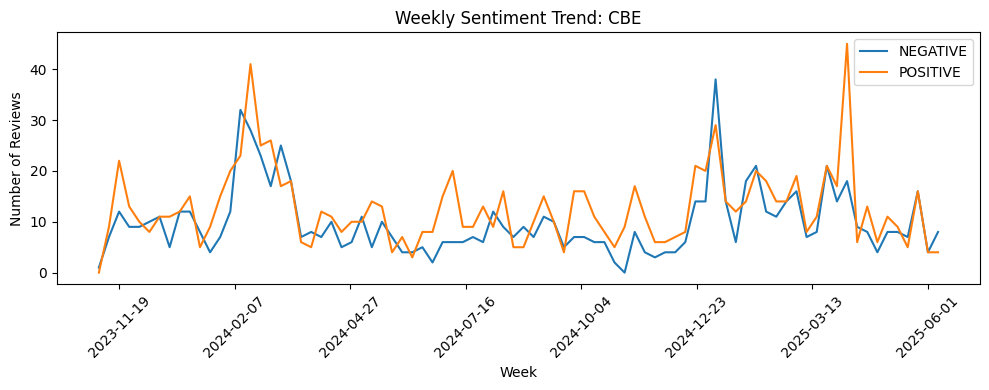

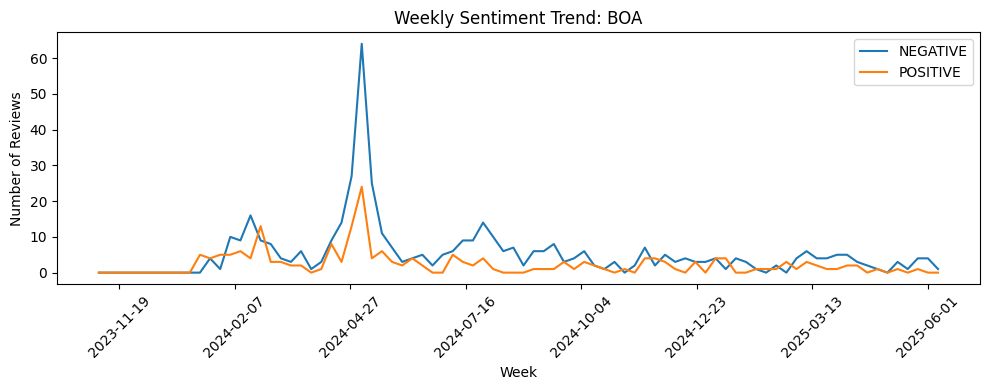

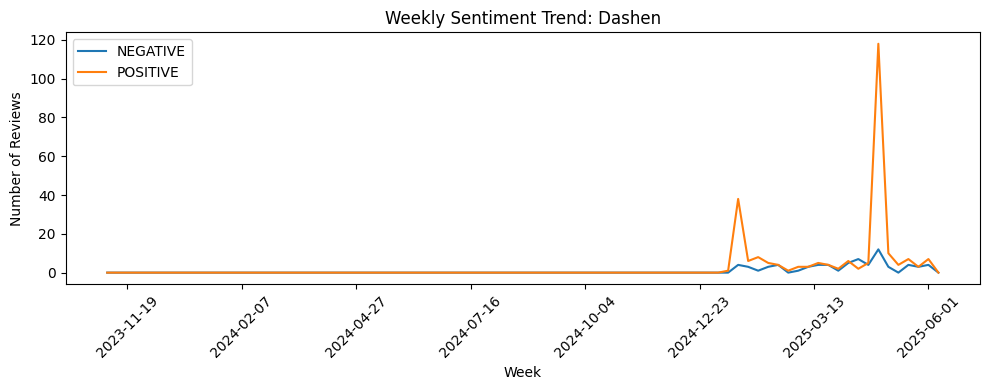

In [11]:
import matplotlib.pyplot as plt

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

# Create a weekly grouped DataFrame by bank and sentiment
trend = df.groupby([pd.Grouper(key='date', freq='W'), 'bank', 'distilbert_sentiment']).size()
trend = trend.unstack(['bank', 'distilbert_sentiment']).fillna(0)

# Plot trend per bank
banks = df['bank'].unique()
for bank in banks:
    plt.figure(figsize=(10,4))
    for sentiment in df['distilbert_sentiment'].unique():
        # Plot each sentiment for this bank
        if (bank, sentiment) in trend.columns:
            plt.plot(trend.index, trend[(bank, sentiment)], label=sentiment)
    plt.title(f'Weekly Sentiment Trend: {bank}')
    plt.xlabel('Week')
    plt.ylabel('Number of Reviews')
    plt.legend()
    plt.xticks(rotation=45)
    # Only show every 2nd or 4th date to prevent clutter (autofmt)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8))
    plt.tight_layout()
    plt.show()


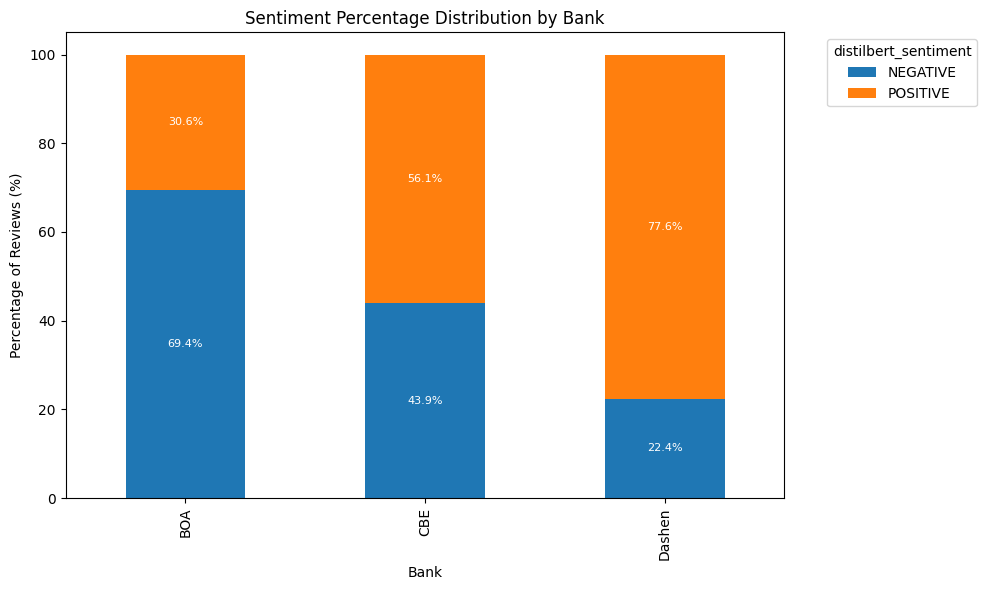

In [12]:
import matplotlib.pyplot as plt

# Calculate sentiment counts per bank
sentiment_by_bank = df.groupby(['bank', 'distilbert_sentiment']).size().unstack().fillna(0)

# Compute percentages per bank
sentiment_percentages = sentiment_by_bank.div(sentiment_by_bank.sum(axis=1), axis=0) * 100

# Plot percentage stacked bar chart
ax = sentiment_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels on each segment
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8, color='white')

# Plot aesthetics
plt.title('Sentiment Percentage Distribution by Bank')
plt.ylabel('Percentage of Reviews (%)')
plt.xlabel('Bank')
plt.legend(title='distilbert_sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
